In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, rdmolops, AllChem, Descriptors


In [2]:
def hist_plot(data, label, xticks, yticks, xlabel, yscale):
    fig, ax = plt.subplots(figsize=(10,6), dpi=300)
    xmax=data[label].max()
    xmin=data[label].min()
    interval=(xmax-xmin)/70.
    n, bins, patches = plt.hist(data[label], bins=np.arange(xmin,xmax,interval)
                                , color='#809bce'
                                , edgecolor='black', linewidth=1.5, density = False )
    ax.tick_params(direction='in', width=2)
    ax.tick_params(axis='x', pad=10)
    ax.tick_params(axis='y', pad=10)
    
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        
    plt.xlabel(xlabel, fontsize=38, font="arial", labelpad=12)
    plt.ylabel('Count', fontsize=38, font="arial", labelpad=12)
    plt.xticks(xticks, fontsize=26)
    plt.yticks(yticks, fontsize=26)
    plt.gca().tick_params(axis='both', length=10, width=2)

#     plt.xlim(xscale[0], xscale[1])
    plt.ylim(yscale[0], yscale[1])
    plt.show()


In [3]:
def svg_plot(foldername, df_contains):
    os.makedirs(foldername, exist_ok=True)

    c_smiles = df_contains['c_smiles'].to_list()
    # len(c_smiles)
    idx_list = df_contains.index.to_list()
    # idx_list[1]

    interval = 40
    # 创建一个绘图选项对象
    options = Draw.MolDrawOptions()
    options.legendFontSize = 30
    for i in range(0,len(c_smiles),interval):
        if (i+interval) <= len(c_smiles):
            sample_smiles = c_smiles[i:i+interval]
        else:
            sample_smiles = c_smiles[i:len(c_smiles)]
        sample_mols = [Chem.MolFromSmiles(smiles) for smiles in sample_smiles]
    #     label = idx_list[i:i+40]
        label = list(map(str, idx_list[i:i+40]))
        grid = Draw.MolsToGridImage(sample_mols,
                                   molsPerRow=5,
                                   subImgSize=(700,700),
                                    legends = label,
                                    drawOptions=options,
                                   useSVG=True
                                   )
    # grid
        path = foldername+'/donor-' + str(i+1) +'.svg'
        with open(path, 'w') as f_handle:
            f_handle.write(grid.data)

In [4]:
# 定义一个函数，用于检查每个SMILES字符串是否包含噻吩环
def contains_frag(smiles_string):
    molecule = Chem.MolFromSmiles(smiles_string)
#     ddp = 'CN1C=C2C(=O)N(C)C=C2C1=O'
    fragment_smiles=block_cs
    fragment_molecule = Chem.MolFromSmiles(fragment_smiles)
    return molecule.HasSubstructMatch(fragment_molecule)

In [5]:
df = pd.read_csv('./raw/atom_number_wH_sort_1115-backbone-correction-newSMILES.csv')
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122
...,...,...,...,...,...
1110,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115
1111,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441
1112,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441
1113,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464


# drop sp3-N polymers + donor-692

In [6]:
sp3_N_list = [  24,   44,  191,  201,  206,  209,  251,  317,  318,  332,  374,
             381,  388,  454,  913,  931,  936, 1006]
drop_list = sp3_N_list+[691]
print('Total data points: ', 1115-len(drop_list))

Total data points:  1096


In [7]:
df = df[~df.index.isin(drop_list)].reset_index(drop=True)
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122
...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464


## 1. BDT: benzodithiophene and its derivatives

In [8]:
df['bdt'] = 0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0
...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0


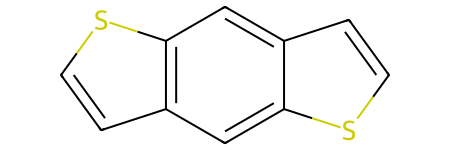

In [11]:
block1 = 'S1C=CC2=CC3=C(C=CS3)C=C12'
block2 = 'O1C=CC2=CC3=C(C=CO3)C=C12'
block3 = '[Se]1C=CC2=CC3=C(C=C[Se]3)C=C12'
block4 = 'O1C=CC2=C1C=C1C=CSC1=C2'
block5 = 'O1C=CC2=C1C=C1C=C[Se]C1=C2' ### not exit
block6 = 'S1C=CC2=C1C=C1C=C[Se]C1=C2' ### not exit
block_list = [block1, block2, block3, block4, block5, block6]
Chem.MolFromSmiles(block1) 

In [12]:
block_cs = [Chem.CanonSmiles(block) for block in block_list]
block_cs

['c1cc2cc3sccc3cc2s1',
 'c1cc2cc3occc3cc2o1',
 'c1cc2cc3[se]ccc3cc2[se]1',
 'c1cc2cc3sccc3cc2o1',
 'c1cc2cc3[se]ccc3cc2o1',
 'c1cc2cc3[se]ccc3cc2s1']

In [13]:
for i in range(df.shape[0]):
    smiles_string = df.loc[i]['newSMILES']
    molecule = Chem.MolFromSmiles(smiles_string)
    fragment0 = Chem.MolFromSmiles(block_cs[0])
    fragment1 = Chem.MolFromSmiles(block_cs[1])
    fragment2 = Chem.MolFromSmiles(block_cs[2])
    fragment3 = Chem.MolFromSmiles(block_cs[3])
    fragment4 = Chem.MolFromSmiles(block_cs[4])
    fragment5 = Chem.MolFromSmiles(block_cs[5])
    frag_juge0 = molecule.HasSubstructMatch(fragment0)
    frag_juge1 = molecule.HasSubstructMatch(fragment1)
    frag_juge2 = molecule.HasSubstructMatch(fragment2)
    frag_juge3 = molecule.HasSubstructMatch(fragment3)
    frag_juge4 = molecule.HasSubstructMatch(fragment4)
    frag_juge5 = molecule.HasSubstructMatch(fragment5)

    if frag_juge0 or frag_juge1 or frag_juge2 or frag_juge3 or frag_juge4 or frag_juge5 :
        df.iloc[i,-1]=1
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0
...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0


In [14]:
df[df['bdt']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt
12,O-PBDT,2.21,CCCCC(CC)COc1c2cc(C)sc2c(OCC(CC)CCCC)c2cc(C)sc12,COc1c2cc(C)sc2c(OC)c2cc(sc12)-c1cc2c(OC)c3sc(c...,S119,1
13,S-PBDT,2.07,CCCCC(CC)CSc1c2cc(C)sc2c(SCC(CC)CCCC)c2cc(C)sc12,CSc1c2cc(C)sc2c(SC)c2cc(sc12)-c1cc2c(SC)c3sc(c...,S119,1
21,PBDT[2H]T,2.10,CCCCC(CC)COc1c2cc(-c3ccc(C)s3)sc2c(OCC(CC)CCCC...,COc1c2cc(sc2c(OC)c2cc(C)sc12)-c1ccc(s1)-c1cc2c...,S130,1
22,PBDT[2F]T,2.10,CCCCC(CC)COc1c2cc(-c3sc(C)c(F)c3F)sc2c(OCC(CC)...,COc1c2cc(C)sc2c(OC)c2cc(sc12)-c1sc(c(F)c1F)-c1...,S130,1
33,PBTCTO,1.85,CCCCC(CC)COc1c2cc(-c3sc(C)c4c3C(=O)C=C4)sc2c(O...,COc1c2cc(C)sc2c(OC)c2cc(sc12)-c1sc(-c2cc3c(OC)...,S236,1
...,...,...,...,...,...,...
1081,P(BDTT-BTBDPPD),2.10,CCCCCCCCCCC(CCCCCCCC)Cn1c(-c2ccc(C)s2)c2c(c1-c...,CN1C(=O)c2c(C1=O)c(-c1ccc(s1)-c1ccc(s1)-c1c3C(...,S462,1
1085,P1,1.16,CCCCCCCCCCCCCCCCC(CC)c1nc2c3nc4c(-c5cc(CCCCCCC...,COc1c2cc(C)sc2c(OC)c2cc(sc12)-c1sc(cc1C)-c1c2n...,S476,1
1088,PBDT-TTI,1.63,CCCCCCCCc1cc(C)sc1-c1cc(CCCCCCCC)c(-c2ccc(-c3c...,COc1c2cc(sc2c(OC)c2cc(sc12)-c1ccc(s1)-c1sc(cc1...,S269,1
1090,PIDTBDTID,1.75,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)/C(=C2/C(=O)N(CC(...,Cc1cc2c(s1)-c1cc3c(cc1C2(c1ccccc1)c1ccccc1)-c1...,S423,1


## distribution analysis

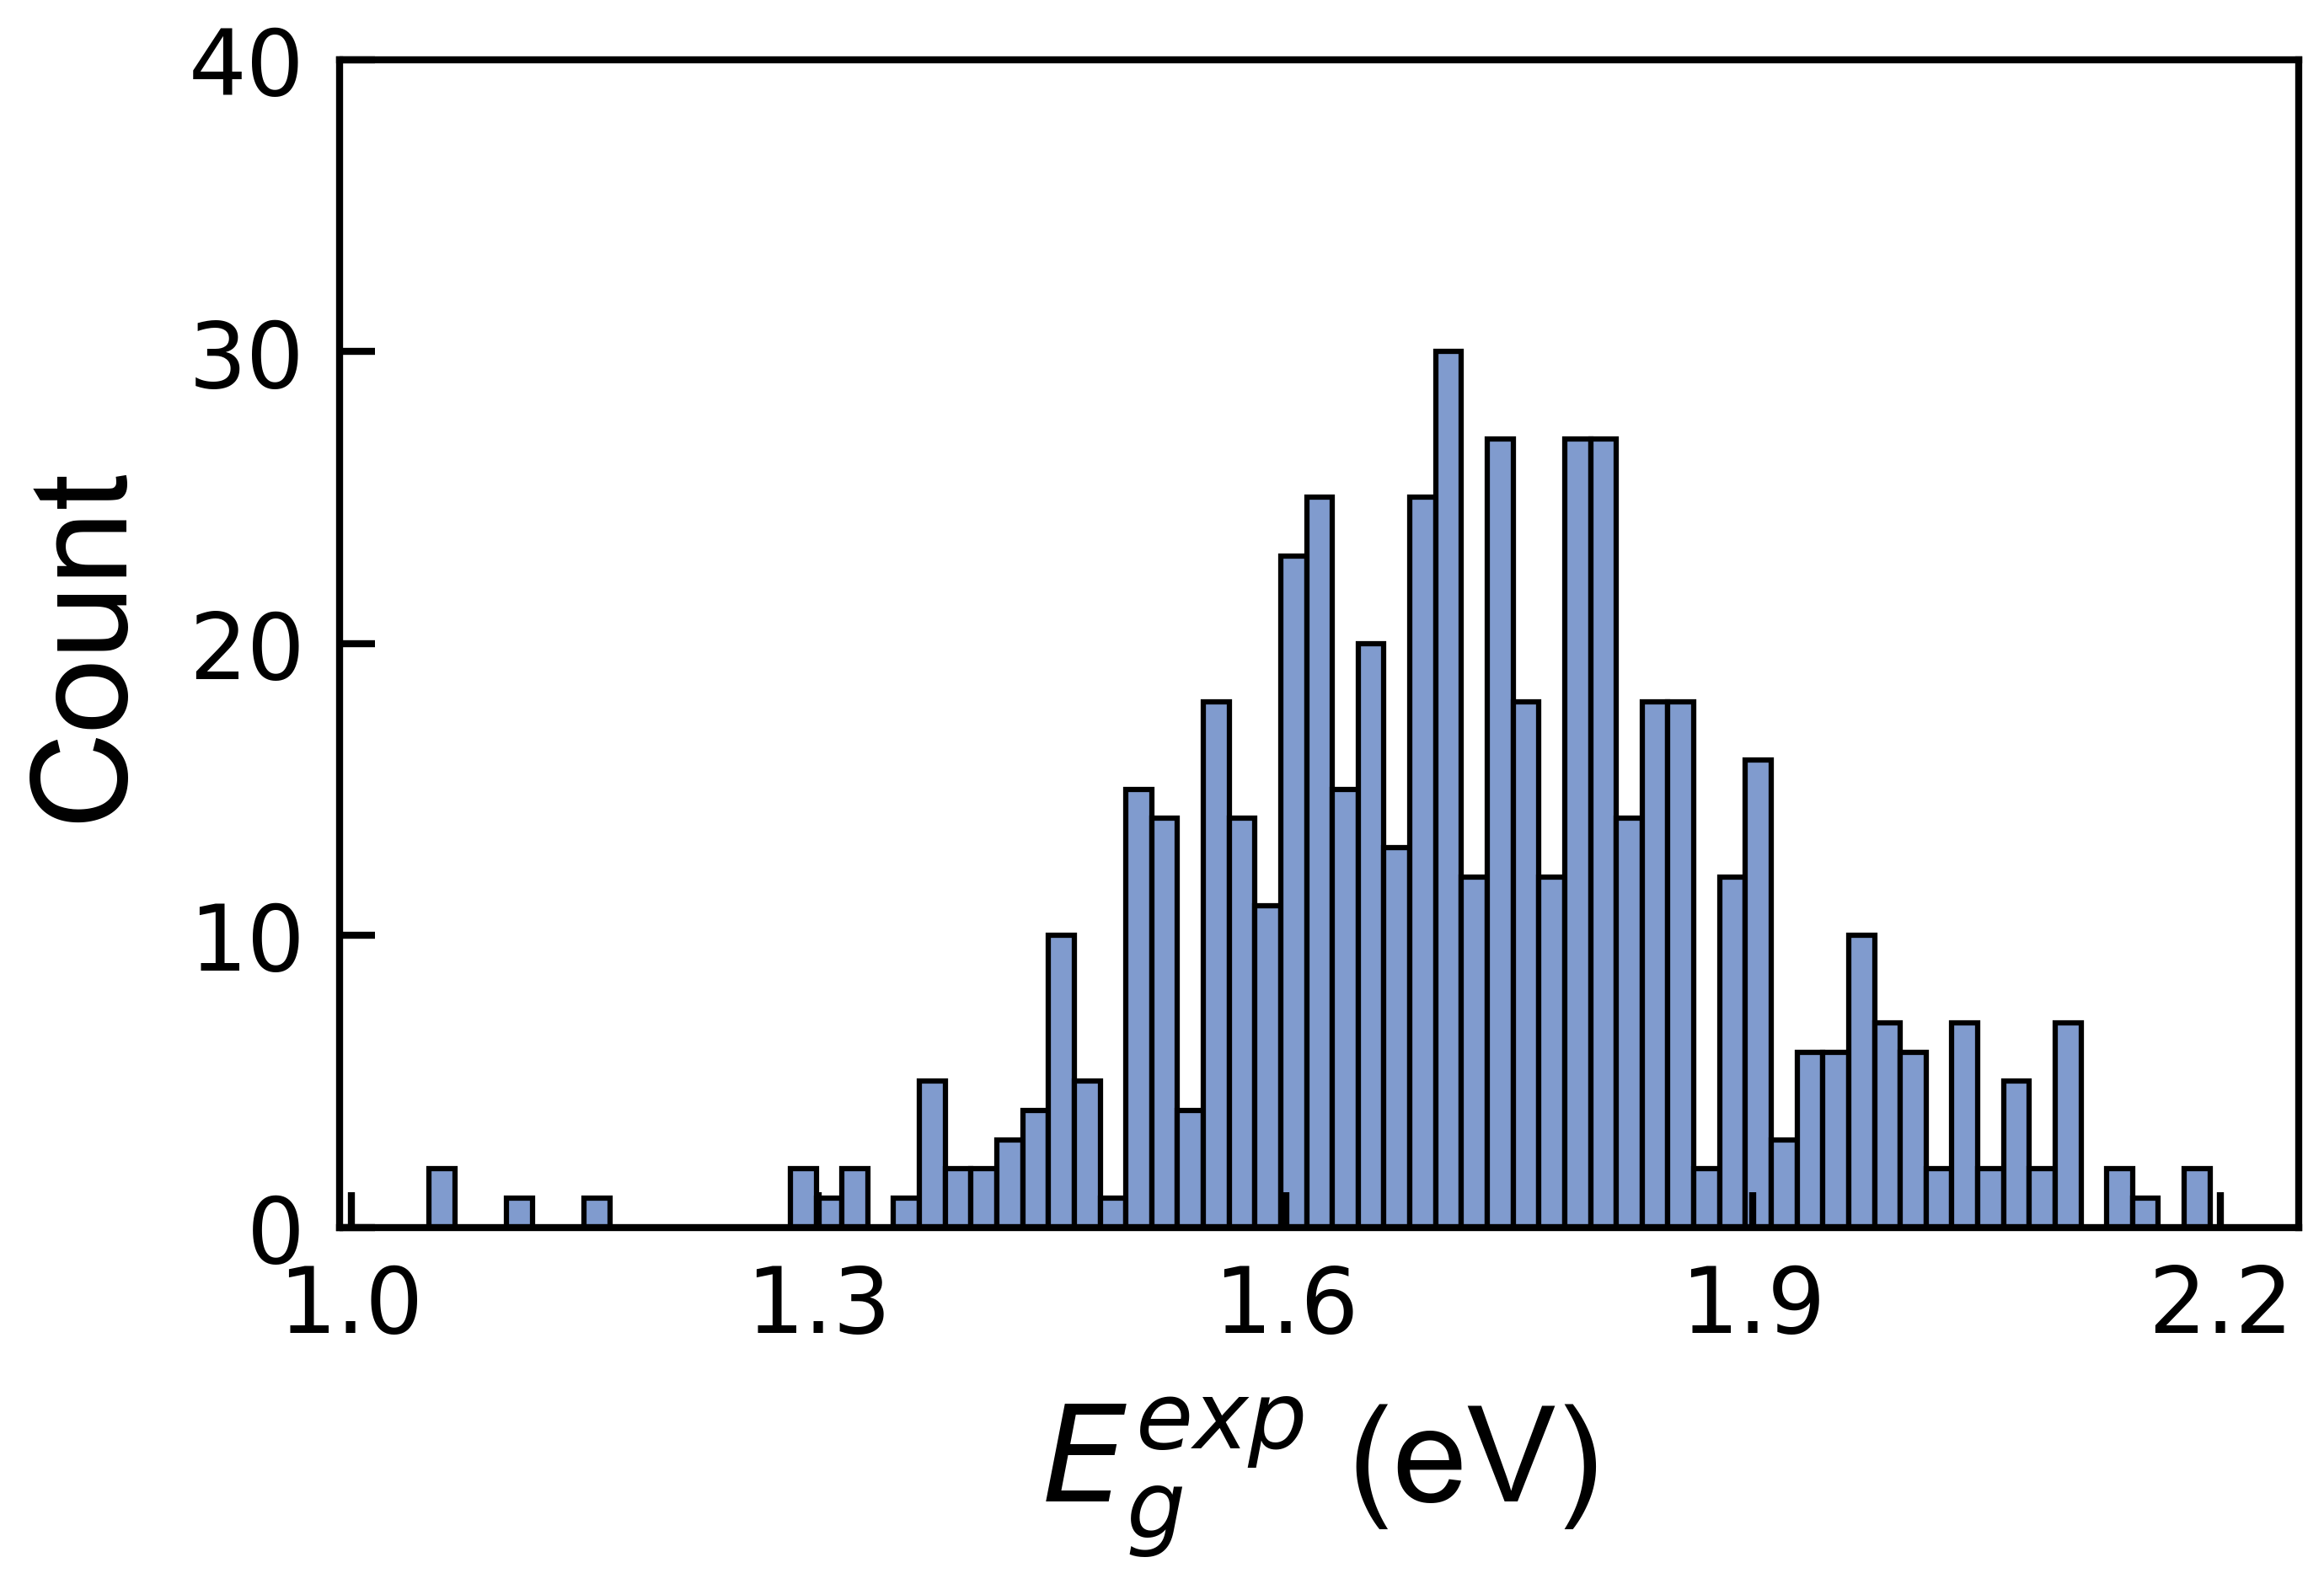

In [15]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 10, 20, 30, 40]
yscale =[0, 40]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['bdt']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

### svg plot

In [19]:
# foldername = 'bdt-svg'
# svg_plot(foldername, df_contains)

## 2. fluorene (FR) and its derivatives

In [16]:
df['fluorene'] = 0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0
...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,0


In [17]:
block_list = [
'C1C2=CC=CC=C2C2=CC=CC=C12',
'N1C2=CC=CC=C2C2=CC=CC=C12',
'O1C2=CC=CC=C2C2=CC=CC=C12',
'[SiH2]1C2=CC=CC=C2C2=CC=CC=C12',
'P1C2=CC=CC=C2C2=CC=CC=C12',
'S1C2=CC=CC=C2C2=CC=CC=C12',
'[Se]1C2=CC=CC=C2C2=CC=CC=C12'
]
Chem.MolFromSmiles(block_list[0]) 

block_cs = [Chem.CanonSmiles(block) for block in block_list]
block_cs

['c1ccc2c(c1)Cc1ccccc1-2',
 'c1ccc2c(c1)[nH]c1ccccc12',
 'c1ccc2c(c1)oc1ccccc12',
 'c1ccc2c(c1)[SiH2]c1ccccc1-2',
 'c1ccc2c(c1)[pH]c1ccccc12',
 'c1ccc2c(c1)sc1ccccc12',
 'c1ccc2c(c1)[se]c1ccccc12']

In [18]:
for i in range(df.shape[0]):
    smiles_string = df.loc[i]['newSMILES']
    molecule = Chem.MolFromSmiles(smiles_string)
    fragment0 = Chem.MolFromSmiles(block_cs[0])
    fragment1 = Chem.MolFromSmiles(block_cs[1])
    fragment2 = Chem.MolFromSmiles(block_cs[2])
    fragment3 = Chem.MolFromSmiles(block_cs[3])
    fragment4 = Chem.MolFromSmiles(block_cs[4])
    fragment5 = Chem.MolFromSmiles(block_cs[5])
    fragment6 = Chem.MolFromSmiles(block_cs[6])
    frag_juge0 = molecule.HasSubstructMatch(fragment0)
    frag_juge1 = molecule.HasSubstructMatch(fragment1)
    frag_juge2 = molecule.HasSubstructMatch(fragment2)
    frag_juge3 = molecule.HasSubstructMatch(fragment3)
    frag_juge4 = molecule.HasSubstructMatch(fragment4)
    frag_juge5 = molecule.HasSubstructMatch(fragment5)
    frag_juge6 = molecule.HasSubstructMatch(fragment6)

    if frag_juge0 or frag_juge1 or frag_juge2 or frag_juge3 or frag_juge4 or frag_juge5 or frag_juge6:
        df.iloc[i,-1]=1
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0
...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0,1
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0,1
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,0


In [19]:
df[df['fluorene']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene
9,PCV,2.30,C/C=C/c1ccc2c3ccc(C)cc3n(-c3ccc(OCCCCCCCC)cc3)...,COc1ccc(cc1)-n1c2cc(C)ccc2c2ccc(\C=C\c3ccc4c(c...,S16,0,1
19,PCVT,2.20,C/C=C/c1ccc2c3ccc(/C=C/c4ccc(C)s4)cc3n(-c3ccc(...,COc1ccc(cc1)-n1c2cc(\C=C\C)ccc2c2ccc(\C=C\c3cc...,S16,0,1
51,PFTTz,2.17,CCCCCCCCc1nc2c(-c3ccc4c(c3)C(CCCCCC)(CCCCCC)c3...,Cc1nc2c(sc(C)c2s1)-c1ccc2-c3ccc(cc3C(C)(C)c2c1...,S141,0,1
58,PCz,2.00,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc(C)ccc2c2ccc(C...,Cc1ccc2c(c1)n(C)c1cc(ccc21)-c1ccc2c(c1)n(C)c1c...,S15,0,1
61,PCTTz,2.11,CCCCCCCCc1nc2c(-c3ccc4c5ccc(C)cc5n(C(CCCCCC)CC...,Cc1nc2c(sc(C)c2s1)-c1ccc2c(c1)n(C)c1cc(ccc21)-...,S141,0,1
...,...,...,...,...,...,...,...
1048,PCDCTDTDPP-C8,1.37,CCCCCCCCC(CCCCCCCC)n1c2cc3c(cc2c2cc4c(cc21)-c1...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S335,0,1
1049,PSiFDCTDPP,1.57,CCCCCCCC[Si]1(CCCCCCCC)c2cc3c(cc2-c2cc4c(cc21)...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S338,0,1
1078,PCDPP,1.55,CCCCCCCCC(CCCCCC)CN1C(=O)C2=C(c3ccc(-c4cc(F)c(...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S432,0,1
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0,1


### distribution plot

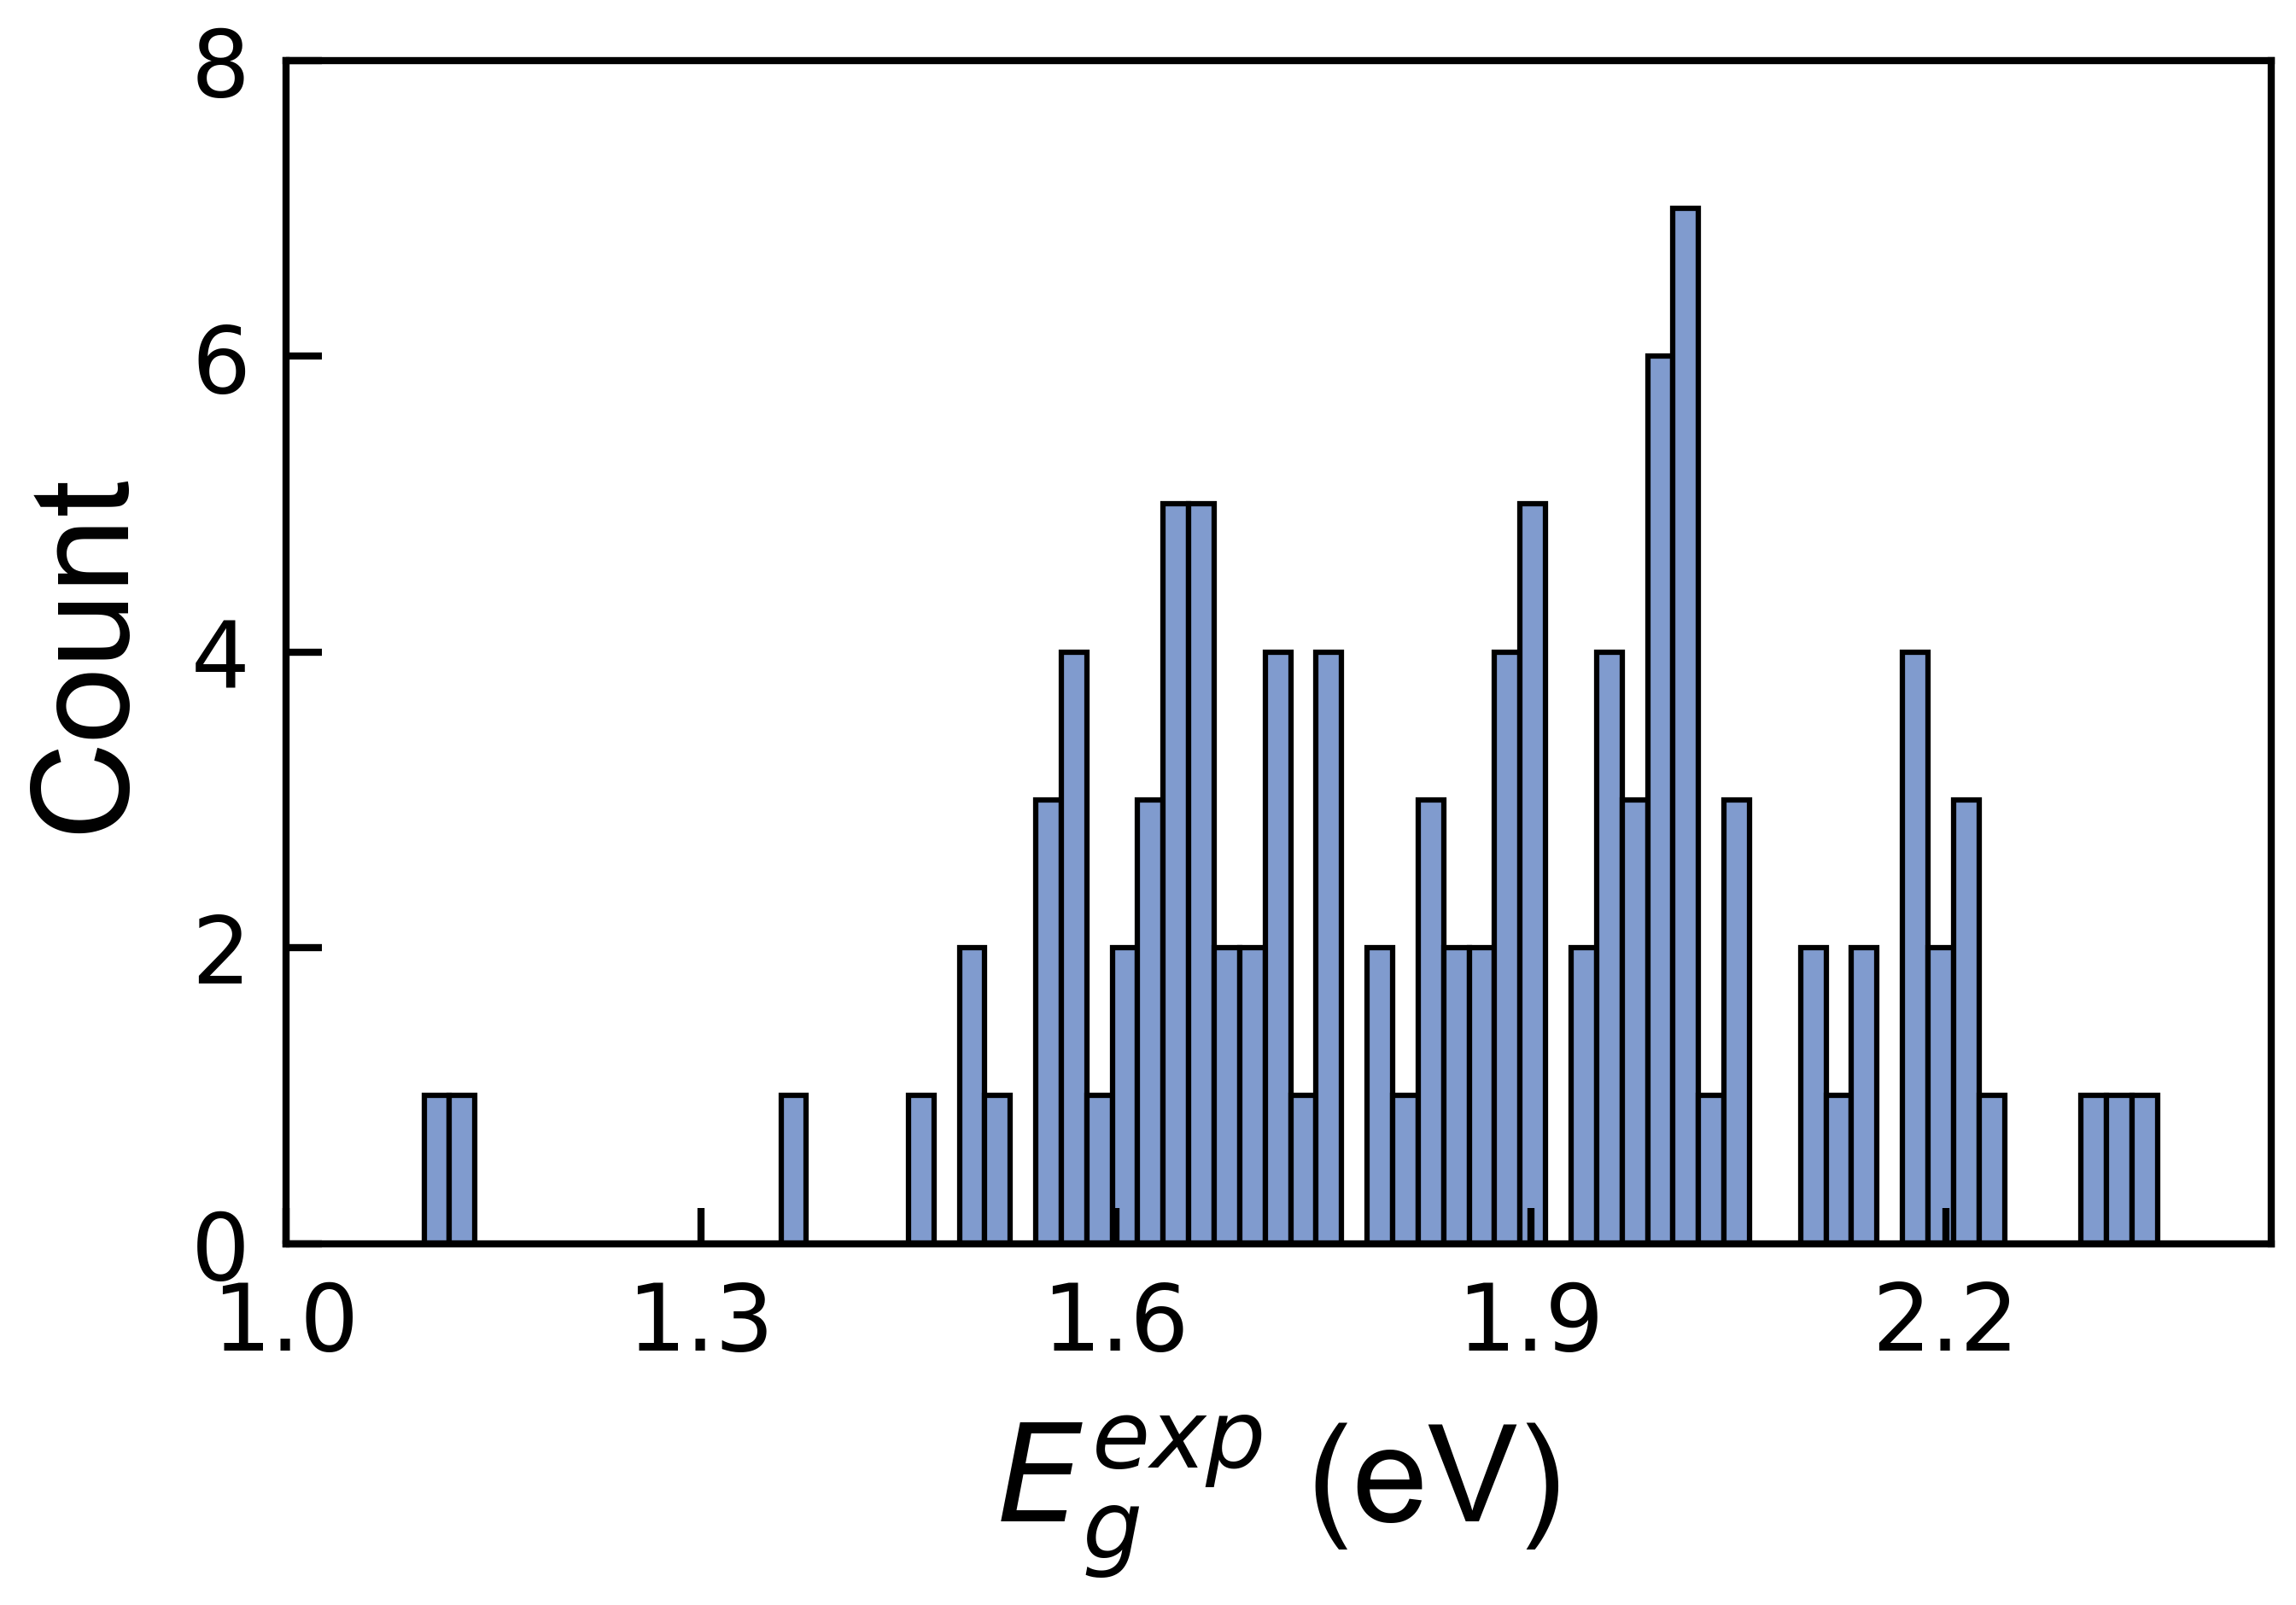

In [20]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 2,4,6,8]
yscale =[0, 8]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['fluorene']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

## 3. CPDT and its derivatives

In [21]:
df['cpdt']=0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene,cpdt
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0
...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0,1,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0,1,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,0,0


In [22]:
block_list = [
'C1C2=C(SC=C2)C2=C1C=CS2',
'N1C2=C(SC=C2)C2=C1C=CS2',
'O1C2=C(SC=C2)C2=C1C=CS2',
'[SiH2]1C2=C(SC=C2)C2=C1C=CS2',
'P1C2=C(SC=C2)C2=C1C=CS2',
'S1C=CC2=C1C1=C(S2)C=CS1',
'S1C=CC2=C1C1=C([Se]2)C=CS1'
]
Chem.MolFromSmiles(block_list[0]) 

block_cs = [Chem.CanonSmiles(block) for block in block_list]
block_cs

['c1cc2c(s1)-c1sccc1C2',
 'c1cc2[nH]c3ccsc3c2s1',
 'c1cc2oc3ccsc3c2s1',
 'c1cc2c(s1)-c1sccc1[SiH2]2',
 'c1cc2[pH]c3ccsc3c2s1',
 'c1cc2sc3ccsc3c2s1',
 'c1cc2[se]c3ccsc3c2s1']

In [23]:
for i in range(df.shape[0]):
    smiles_string = df.loc[i]['newSMILES']
    molecule = Chem.MolFromSmiles(smiles_string)
    fragment0 = Chem.MolFromSmiles(block_cs[0])
    fragment1 = Chem.MolFromSmiles(block_cs[1])
    fragment2 = Chem.MolFromSmiles(block_cs[2])
    fragment3 = Chem.MolFromSmiles(block_cs[3])
    fragment4 = Chem.MolFromSmiles(block_cs[4])
    fragment5 = Chem.MolFromSmiles(block_cs[5])
    fragment6 = Chem.MolFromSmiles(block_cs[6])
    frag_juge0 = molecule.HasSubstructMatch(fragment0)
    frag_juge1 = molecule.HasSubstructMatch(fragment1)
    frag_juge2 = molecule.HasSubstructMatch(fragment2)
    frag_juge3 = molecule.HasSubstructMatch(fragment3)
    frag_juge4 = molecule.HasSubstructMatch(fragment4)
    frag_juge5 = molecule.HasSubstructMatch(fragment5)
    frag_juge6 = molecule.HasSubstructMatch(fragment6)

    if frag_juge0 or frag_juge1 or frag_juge2 or frag_juge3 or frag_juge4 or frag_juge5 or frag_juge6:
        df.iloc[i,-1]=1
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene,cpdt
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0
...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0,1,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0,1,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,0,0


In [24]:
df[df['cpdt']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene,cpdt
8,PDTPBT-C5,1.43,CCCCCC(CCCCC)n1c2cc(C)sc2c2sc(-c3ccc(C)c4nsnc3...,Cc1cc2n(C)c3cc(sc3c2s1)-c1ccc(-c2cc3n(C)c4cc(s...,S359,0,0,1
11,PDTPBT-C6,1.42,CCCCCCC(CCCCCC)n1c2cc(C)sc2c2sc(-c3ccc(C)c4nsn...,Cc1cc2n(C)c3cc(sc3c2s1)-c1ccc(-c2cc3n(C)c4cc(s...,S359,0,0,1
24,PSBTBT,1.45,CCCCC(CC)C[Si]1(CC(CC)CCCC)c2cc(C)sc2-c2sc(-c3...,Cc1cc2c(s1)-c1sc(cc1[Si]2(C)C)-c1ccc(-c2cc3c(s...,S6,0,0,1
25,PCPDTBT,1.43,CCCCC(CC)CC1(CC(CC)CCCC)c2cc(C)sc2-c2sc(-c3ccc...,Cc1cc2c(s1)-c1sc(cc1C2(C)C)-c1ccc(-c2cc3c(s2)-...,S3,0,0,1
26,PCPDTDFBT,1.51,CCCCC(CC)CC1(CC(CC)CCCC)c2cc(C)sc2-c2sc(-c3c(F...,Cc1cc2c(s1)-c1sc(cc1C2(C)C)-c1c(F)c(F)c(-c2cc3...,S345,0,0,1
...,...,...,...,...,...,...,...,...
895,PDTCTTTPD,1.72,CCCCCCCCOc1ccc(C2(c3ccc(OCCCCCCCC)cc3)c3cc(C)s...,CN1C(=O)c2c(C)sc(-c3cc4c(s3)-c3sc5c6c(sc5c3C4(...,S329,0,0,1
919,PBDCPDT-TPD,1.88,CCCCCCCCOc1ccc(C2(c3ccc(OCCCCCCCC)cc3)c3cc(C)s...,CN1C(=O)c2c(C)sc(-c3cc4c(s3)-c3sc5cc6c7c(sc6cc...,S339,1,0,1
982,PSDTTT,1.77,CCCCCCCC[Si]1(CCCCCCCC)c2cc(C)sc2-c2sc(-c3nc4s...,COc1c2cc(sc2c(OC)c2cc(C)sc12)-c1cc2c(s1)-c1sc(...,S312,1,0,1
1072,PIDTCPDT-DFBT,1.59,CCCCCCc1ccc(C2(c3ccc(CCCCCC)cc3)c3cc4c(cc3-c3s...,Cc1cc2c(s1)-c1sc3c4c(sc3c1C2(c1ccccc1)c1ccccc1...,S344,0,0,1


### distribution plot

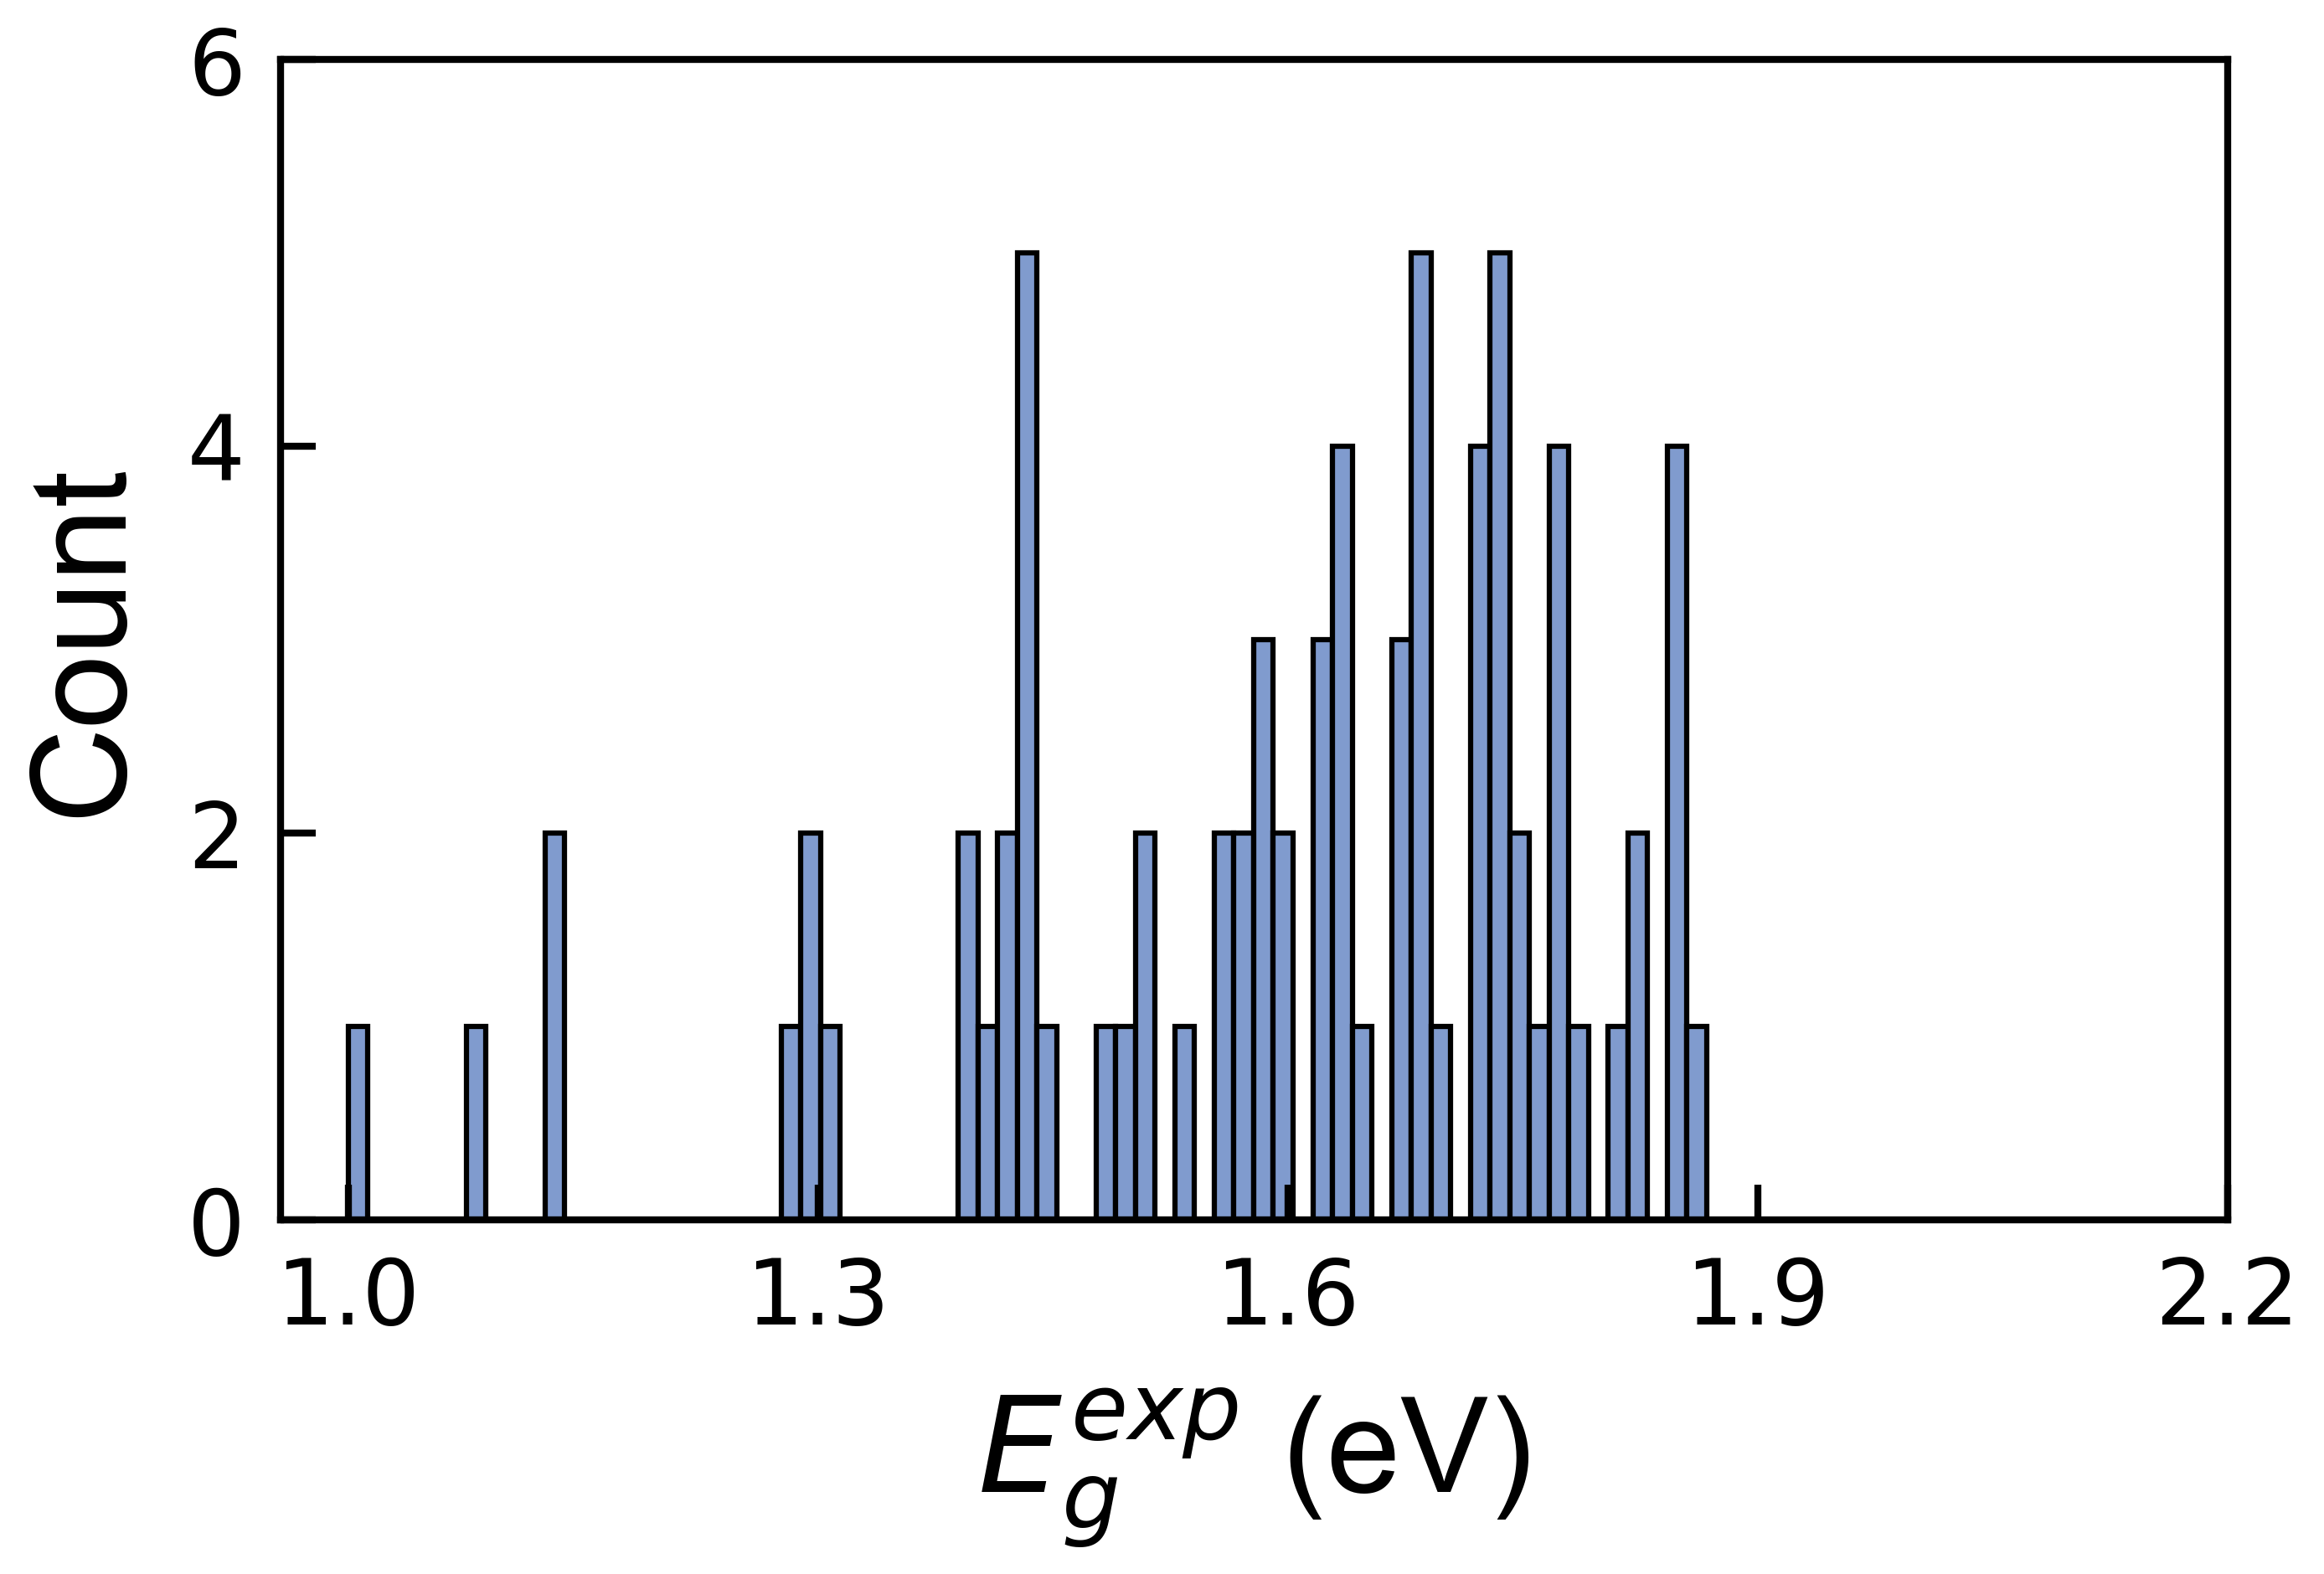

In [25]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 2,4,6]
yscale =[0, 6]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['cpdt']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

## 4. TDT and its derivatives

In [26]:
df['tdt']=0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene,cpdt,tdt
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0,0,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0,1,0,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0,1,0,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,0,0,0


In [27]:
block_list = [
'C1C2=C(SC=C2)C2=CC3=C(C=C12)C1=C(C3)C=CS1',
'N1C2=C(SC=C2)C2=CC3=C(C=C12)C1=C(N3)C=CS1',
'O1C2=C(SC=C2)C2=CC3=C(C=C12)C1=C(O3)C=CS1',
'[SiH2]1C2=C(SC=C2)C2=CC3=C(C=C12)C1=C([SiH2]3)C=CS1',
'P1C2=C(SC=C2)C2=CC3=C(C=C12)C1=C(P3)C=CS1',
'S1C=CC2=C1C1=CC3=C(C=C1S2)C1=C(S3)C=CS1',
'S1C=CC2=C1C1=CC3=C(C=C1[Se]2)C1=C([Se]3)C=CS1'
]
Chem.MolFromSmiles(block_list[0]) 

block_cs = [Chem.CanonSmiles(block) for block in block_list]
block_cs

['c1cc2c(s1)-c1cc3c(cc1C2)-c1sccc1C3',
 'c1cc2[nH]c3cc4c(cc3c2s1)[nH]c1ccsc14',
 'c1cc2oc3cc4c(cc3c2s1)oc1ccsc14',
 'c1cc2c(s1)-c1cc3c(cc1[SiH2]2)-c1sccc1[SiH2]3',
 'c1cc2[pH]c3cc4c(cc3c2s1)[pH]c1ccsc14',
 'c1cc2sc3cc4c(cc3c2s1)sc1ccsc14',
 'c1cc2[se]c3cc4c(cc3c2s1)[se]c1ccsc14']

In [28]:
for i in range(df.shape[0]):
    smiles_string = df.loc[i]['newSMILES']
    molecule = Chem.MolFromSmiles(smiles_string)
    fragment0 = Chem.MolFromSmiles(block_cs[0])
    fragment1 = Chem.MolFromSmiles(block_cs[1])
    fragment2 = Chem.MolFromSmiles(block_cs[2])
    fragment3 = Chem.MolFromSmiles(block_cs[3])
    fragment4 = Chem.MolFromSmiles(block_cs[4])
    fragment5 = Chem.MolFromSmiles(block_cs[5])
    fragment6 = Chem.MolFromSmiles(block_cs[6])
    frag_juge0 = molecule.HasSubstructMatch(fragment0)
    frag_juge1 = molecule.HasSubstructMatch(fragment1)
    frag_juge2 = molecule.HasSubstructMatch(fragment2)
    frag_juge3 = molecule.HasSubstructMatch(fragment3)
    frag_juge4 = molecule.HasSubstructMatch(fragment4)
    frag_juge5 = molecule.HasSubstructMatch(fragment5)
    frag_juge6 = molecule.HasSubstructMatch(fragment6)

    if frag_juge0 or frag_juge1 or frag_juge2 or frag_juge3 or frag_juge4 or frag_juge5 or frag_juge6:
        df.iloc[i,-1]=1
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene,cpdt,tdt
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0,0,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0,1,0,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0,1,0,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,0,0,0


In [29]:
df[df['tdt']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene,cpdt,tdt
296,PIDTV-ffBT,1.53,CCCCCCCCC(/C=C1\c2cc3c(cc2-c2sc(C)cc21)/C(=C\C...,Cc1cc2C(=C)c3cc-4c(cc3-c2s1)C(=C)c1cc(sc-41)-c...,S435,0,0,0,1
311,PTDBD2,1.67,CCCCCCC(CCCC)COC(=O)c1sc2c(C)sc(-c3cc4sc5c(CC(...,COC(=O)c1sc2c(C)sc(-c3cc4sc5c(C)c6c(sc7cc(sc67...,S282,1,0,0,1
329,P-1,1.96,CCCCCCCC[Si]1(CCCCCCCC)c2cc3c(cc2-c2sc(C)cc21)...,Cc1cc2c(s1)-c1cc3c(cc1[Si]2(C)C)-c1sc(cc1[Si]3...,S322,0,0,0,1
369,PBDPTBT,1.52,CCCCCCCCC(CCCCCCCC)n1c2cc3c4sc(-c5ccc(C)c6nsnc...,Cc1cc2n(C)c3cc4c(cc3c2s1)n(C)c1cc(sc41)-c1ccc(...,S323,0,0,0,1
434,PTR5b,1.66,CCCCCCC(CCCC)COC(=O)c1sc2c(-c3cc4sc5c(OCC(CCCC...,COC(=O)c1sc2c(sc(C)c2c1F)-c1cc2sc3c(OC)c4c(sc5...,S283,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1086,PTPTPTQX,1.80,CCCCCCCCOc1ccc(C2(c3ccc(OCCCCCCCC)cc3)c3cc4c(c...,Cc1cc2c(s1)-c1cc3c(cc1C2(c1ccccc1)c1ccccc1)-c1...,S343,0,0,0,1
1087,PIDT-DTQ,1.63,CCCCCCCCOc1cccc(-c2nc3c(C)ccc(-c4ccc(-c5ccc(-c...,Cc1ccc(s1)-c1cc2c(s1)-c1cc3c(cc1C2(c1ccccc1)c1...,S465,0,0,0,1
1089,PIDT-DTQ-TT,1.60,CCCCCCCCOc1cccc(-c2nc3c(C)ccc(-c4cc5sc(-c6ccc(...,Cc1ccc(s1)-c1cc2c(s1)-c1cc3c(cc1C2(c1ccccc1)c1...,S430,0,0,0,1
1090,PIDTBDTID,1.75,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)/C(=C2/C(=O)N(CC(...,Cc1cc2c(s1)-c1cc3c(cc1C2(c1ccccc1)c1ccccc1)-c1...,S423,1,0,0,1


### distribution plot

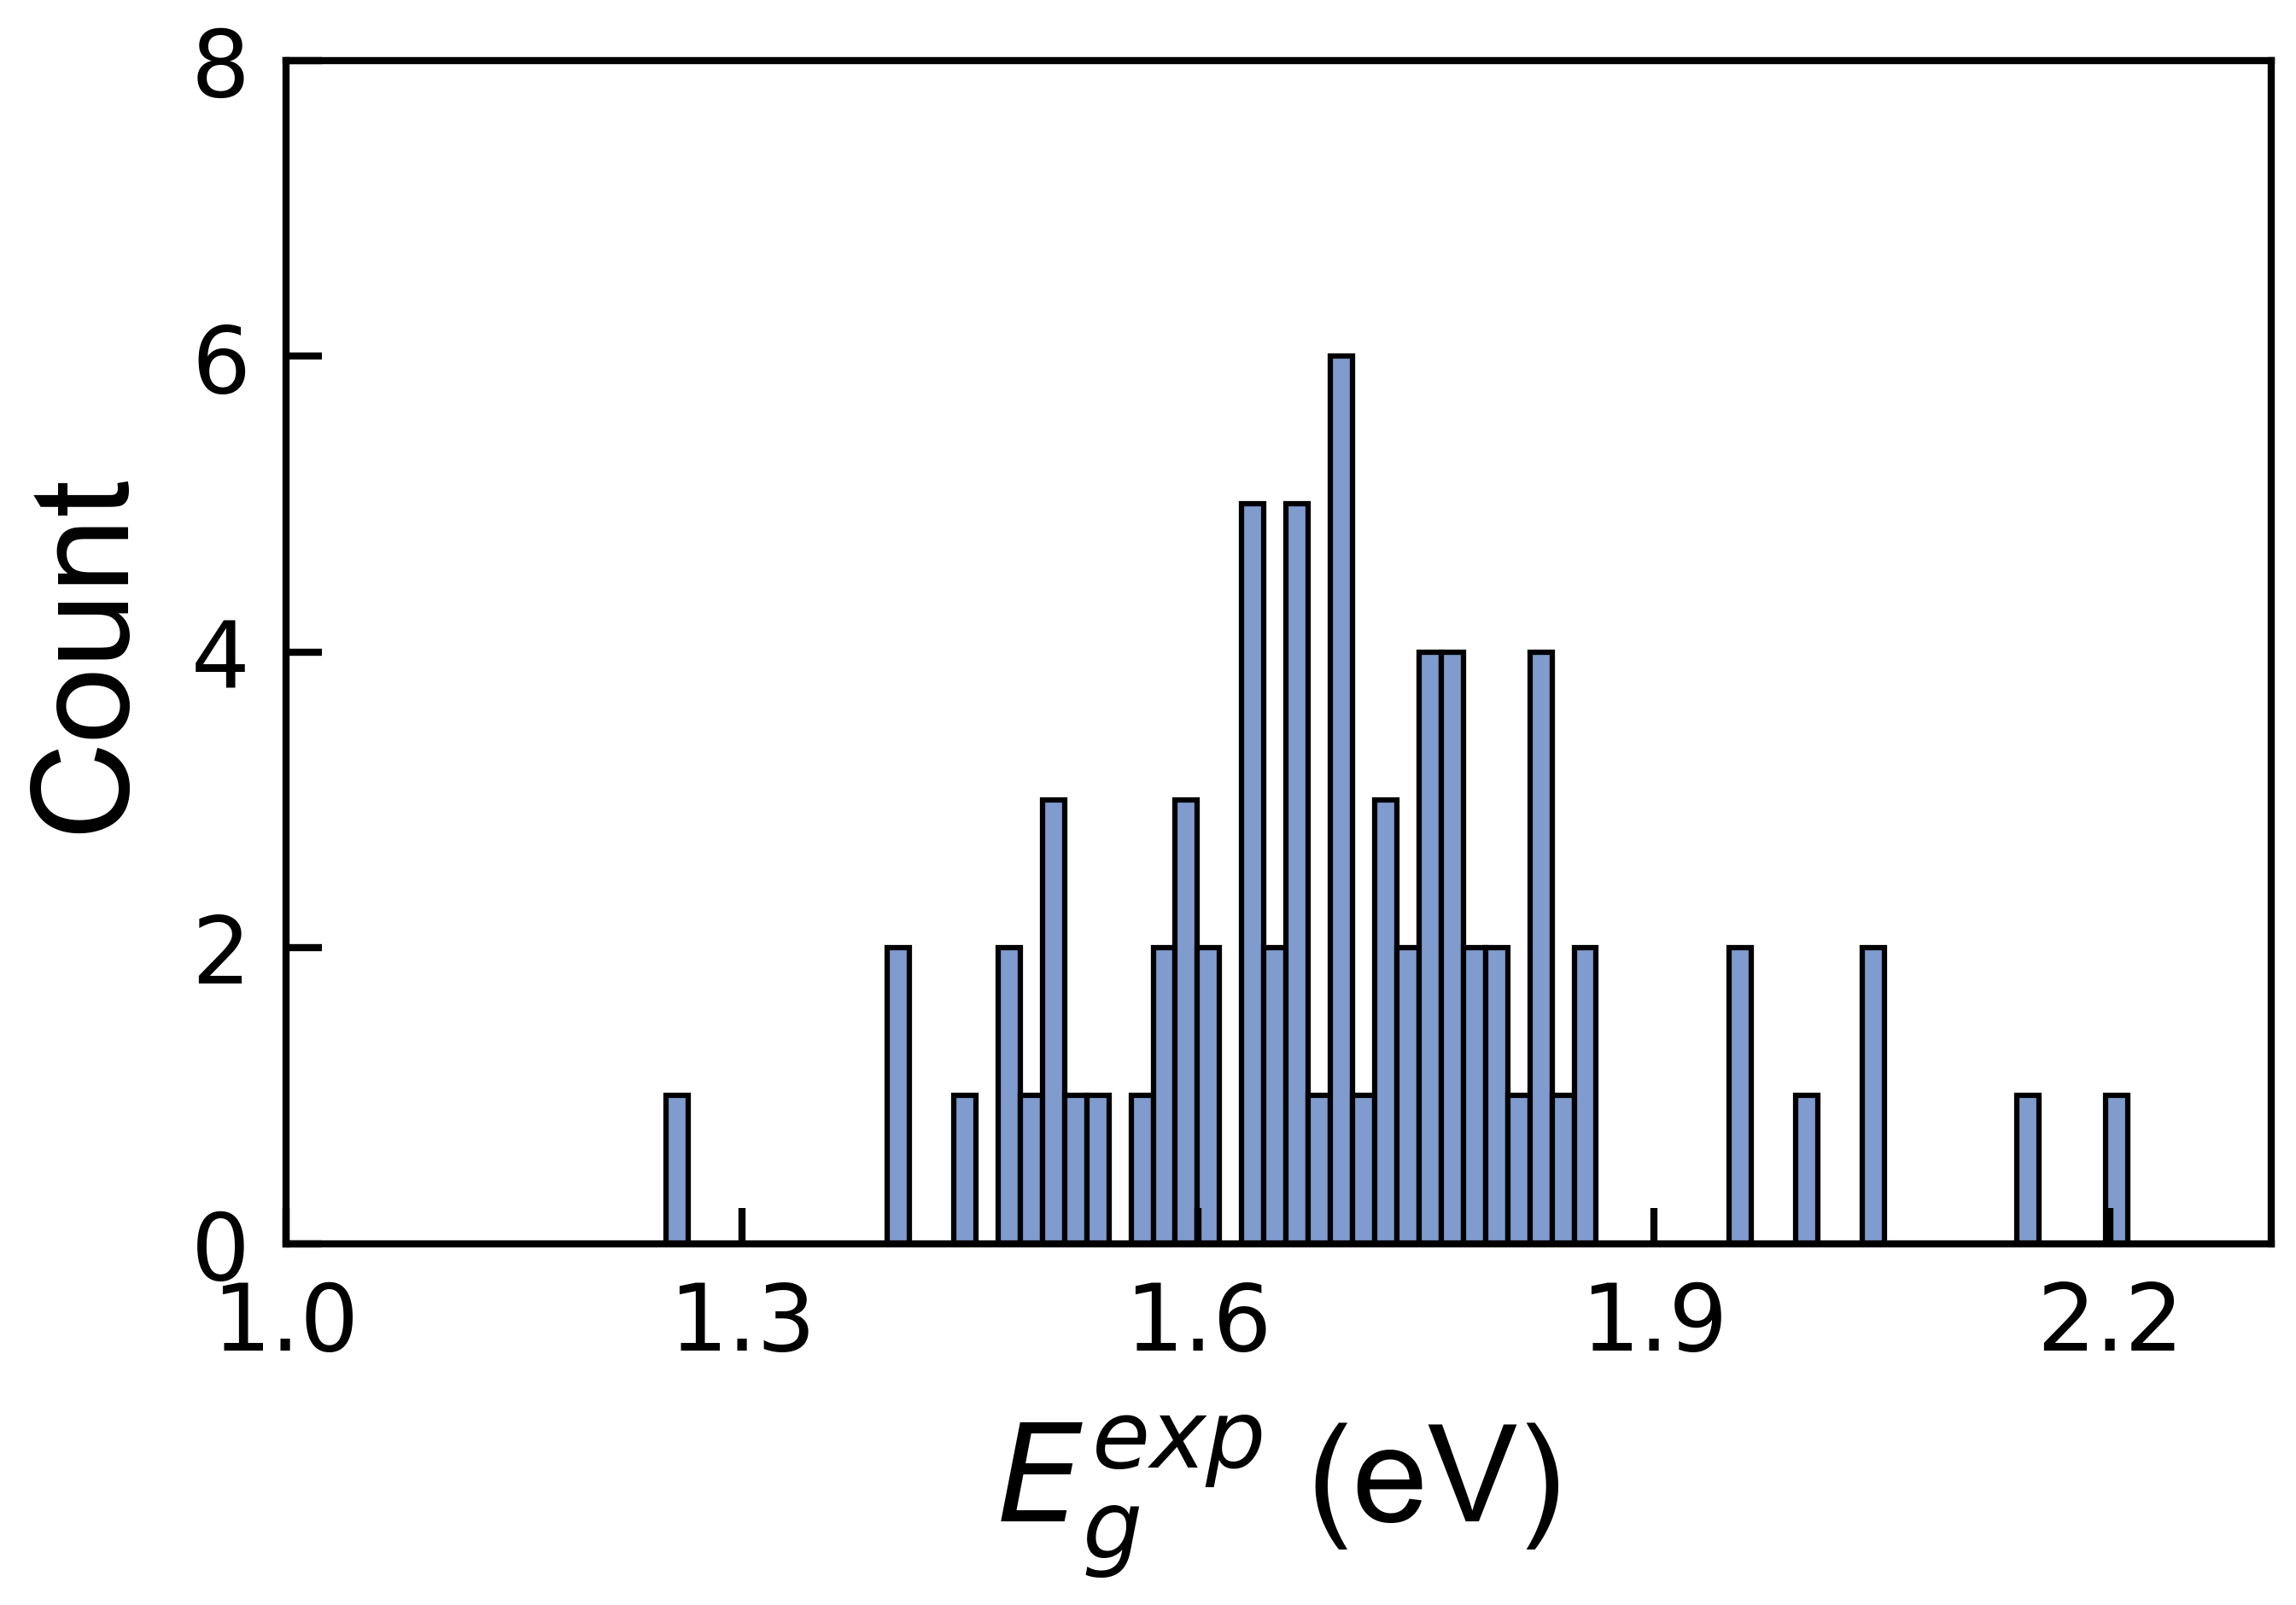

In [30]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 2,4,6,8]
yscale =[0, 8]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['tdt']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

## 5. others

In [31]:
df['others'] = 0
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene,cpdt,tdt,others
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0,0,0
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0,0,0
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0,0,0
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0,0,0
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0,0,0,0,0
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,0,1,0,0,0
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,0,1,0,0,0
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,0,0,0,0,0


In [32]:
for i in range(df.shape[0]):
    s = df.iloc[i,-2] + df.iloc[i,-3] + df.iloc[i,-4] + df.iloc[i,-5]
    if s==0:  ### does not contain at least one type of donor unit
        df.iloc[i,-1]=1


In [33]:
df[df['others']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene,cpdt,tdt,others
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,0,0,0,0,1
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,0,0,0,0,1
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,0,0,0,0,1
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,0,0,0,0,1
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1082,TT2,1.45,CCCCCCCCCCCCc1cc(-c2cc3c(s2)/C(=C2\C(=O)N(CC(C...,CN1C(=O)\C(=C2\C(=O)N(C)c3cc(ccc23)-c2cc(C)c(s...,S97,0,0,0,0,1
1083,BT2,1.49,CCCCCCCCCCCCc1cc(-c2cc3c(s2)/C(=C2\C(=O)N(CC(C...,CN1C(=O)\C(=C2/C(=O)N(C)c3cc(ccc23)-c2cc(C)c(s...,S97,0,0,0,0,1
1084,F-BT2,1.49,CCCCCCCCCCCCc1cc(-c2cc3c(s2)/C(=C2\C(=O)N(CC(C...,CN1C(=O)\C(=C2/C(=O)N(C)c3c2ccc(-c2cc(C)c(s2)-...,S292,0,0,0,0,1
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,0,0,0,0,1


### distribution plot

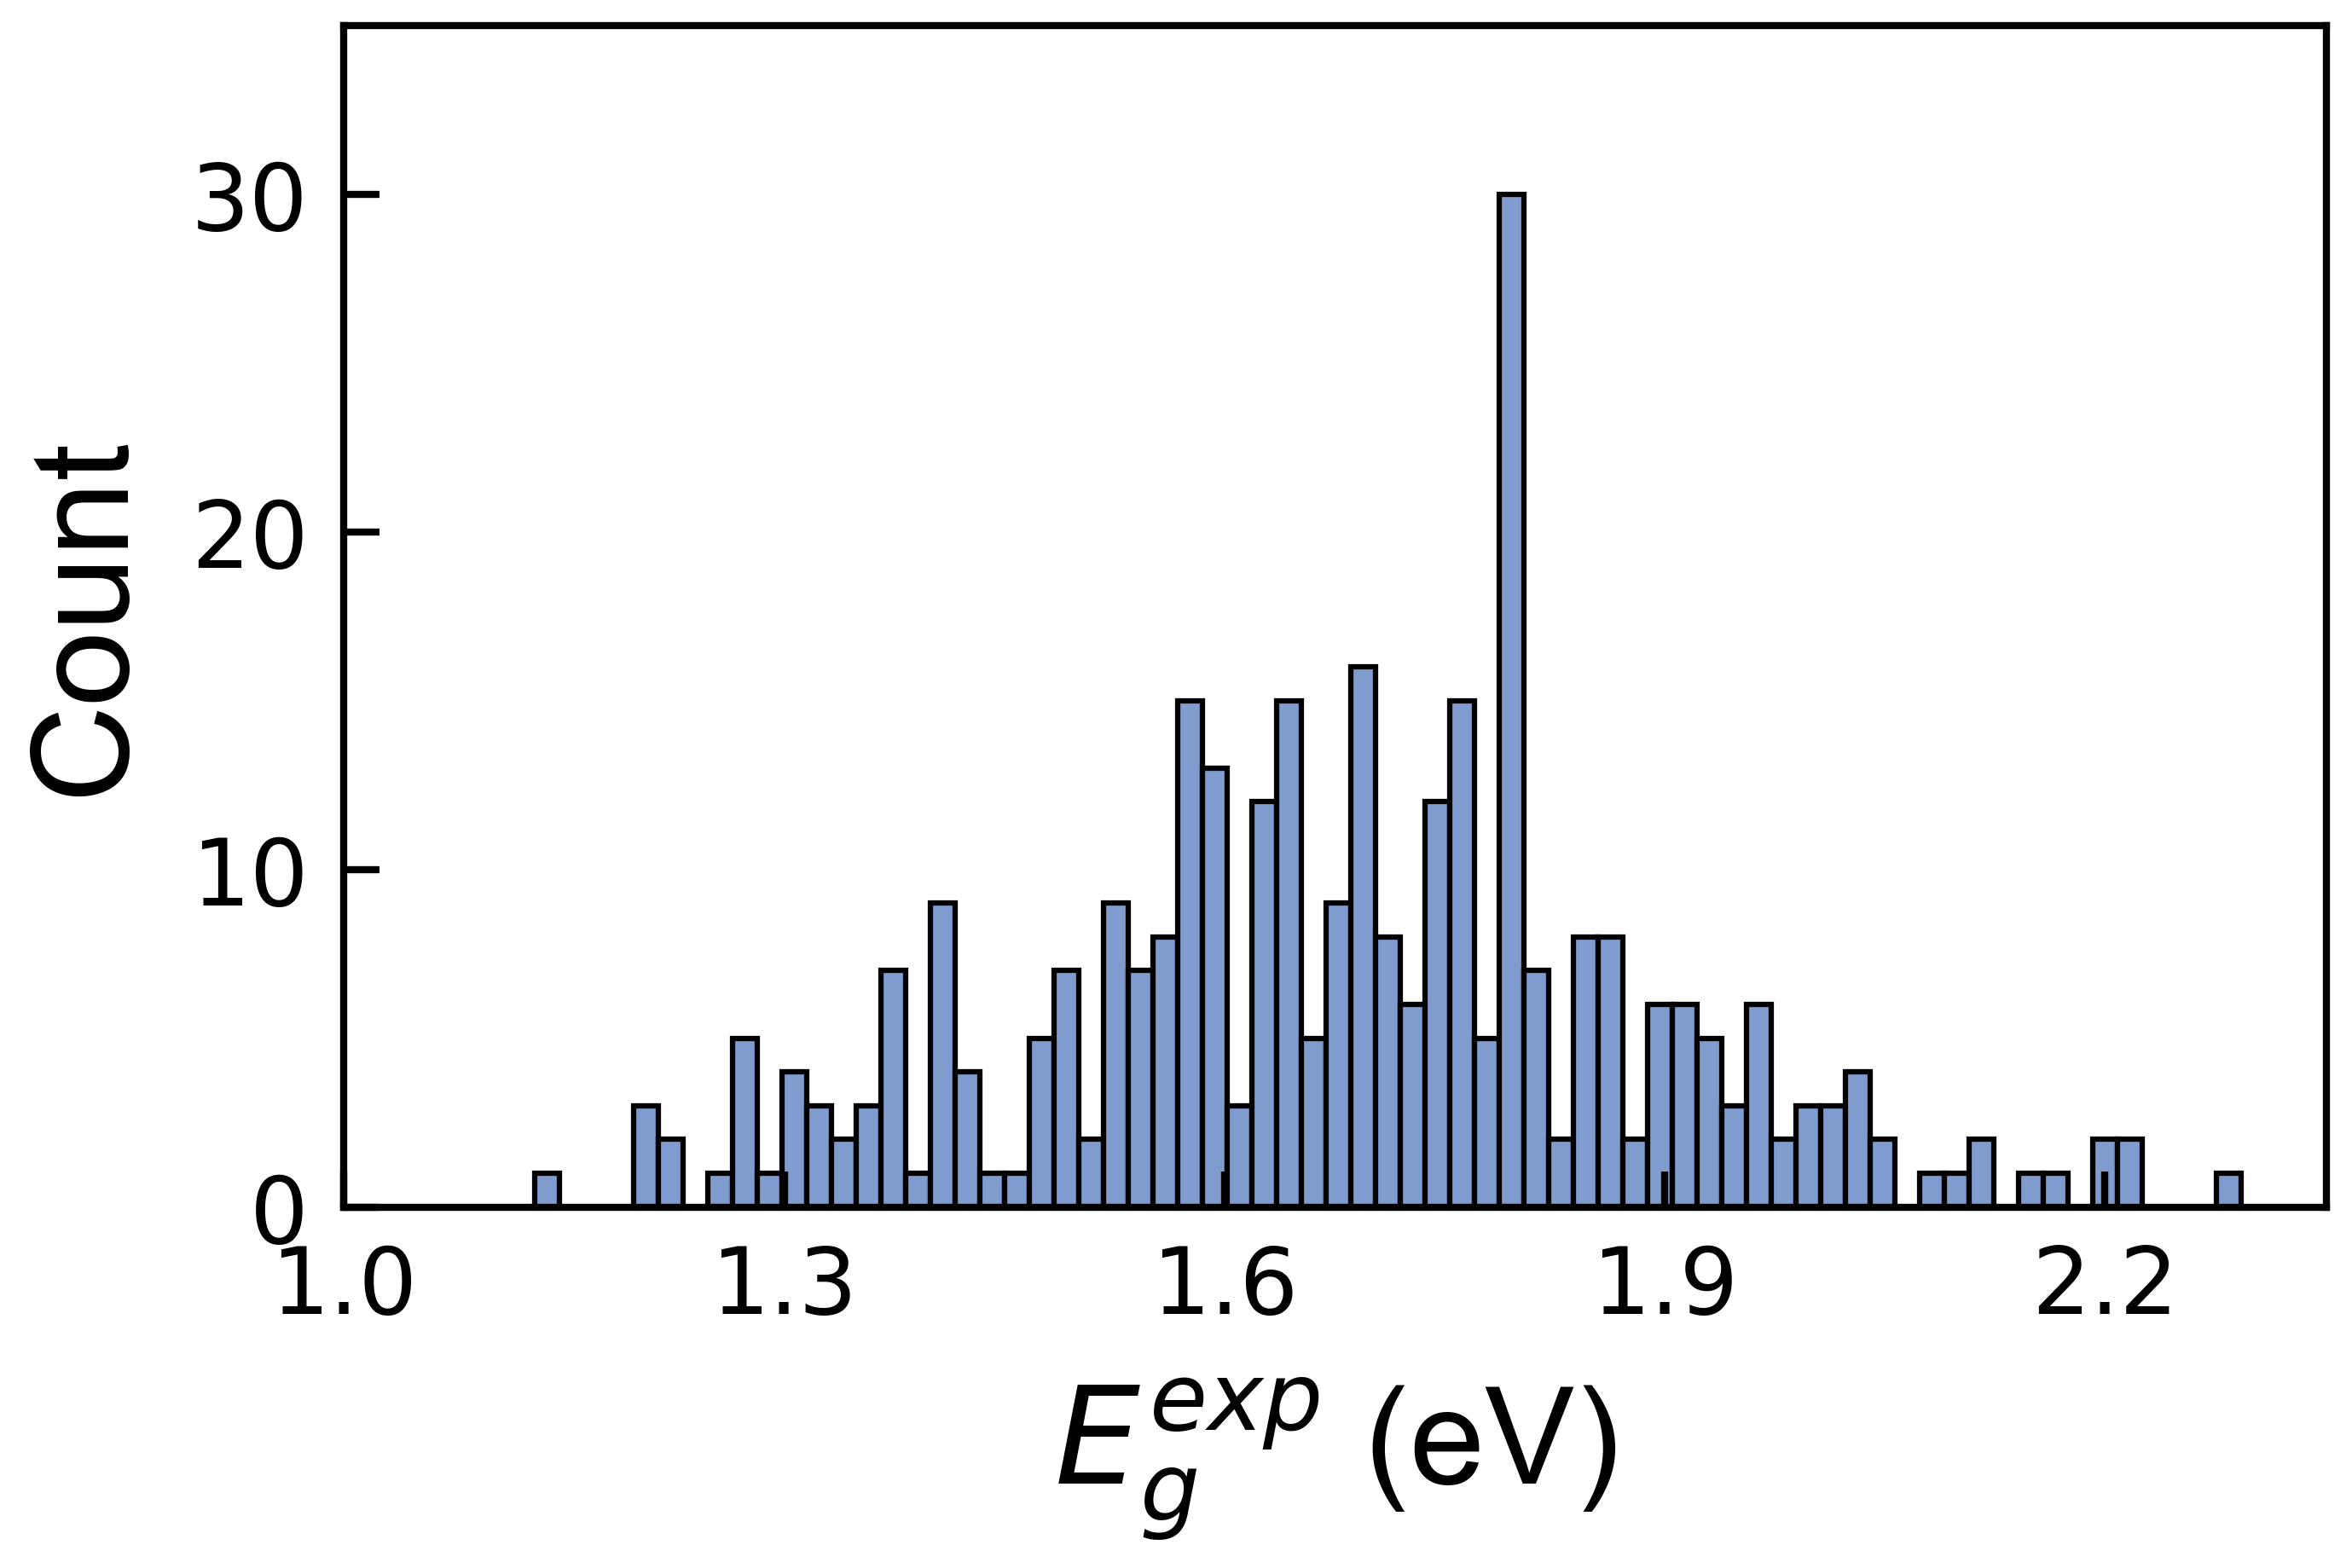

In [34]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0, 10, 20, 30]
yscale =[0, 35]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df[df['others']==1], 'bandgap(eV)', xticks, yticks, xlabel, yscale)

In [35]:
df.to_csv('building-block-donor.csv', index= False)

## contain multiple types of donor units

In [36]:
df['multi_unit'] = 0

for i in range(df.shape[0]):
    s = df.iloc[i,-3] + df.iloc[i,-4] + df.iloc[i,-5] + df.iloc[i, -6]
    if s>1:  ### does not contain at least one type of donor unit
        df.iloc[i,-1]=1

In [37]:
df[df['multi_unit']==1]

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,bdt,fluorene,cpdt,tdt,others,multi_unit
311,PTDBD2,1.67,CCCCCCC(CCCC)COC(=O)c1sc2c(C)sc(-c3cc4sc5c(CC(...,COC(=O)c1sc2c(C)sc(-c3cc4sc5c(C)c6c(sc7cc(sc67...,S282,1,0,0,1,0,1
434,PTR5b,1.66,CCCCCCC(CCCC)COC(=O)c1sc2c(-c3cc4sc5c(OCC(CCCC...,COC(=O)c1sc2c(sc(C)c2c1F)-c1cc2sc3c(OC)c4c(sc5...,S283,1,0,0,1,0,1
436,PDT-S-T,1.59,CCCCCCCCC(CCCCCC)CS(=O)(=O)c1cc2c(C)sc(-c3cc4s...,Cc1cc2sc3c(-c4cccs4)c4c(sc5cc(sc45)-c4sc(-c5cc...,S42,1,0,0,1,0,1
450,PTDBD3,1.67,CCCCC(CC)CCC(CC(CC)CCCC)OC(=O)c1sc2c(C)sc(-c3c...,COC(=O)c1sc2c(C)sc(-c3cc4sc5c(C)c6c(sc7cc(sc67...,S282,1,0,0,1,0,1
527,PDTT,1.59,CCCCCCCCC(CCCCCC)COc1c2sc3cc(-c4sc(C)c5sc(C(=O...,COc1c2sc3cc(sc3c2c(OC)c2sc3cc(C)sc3c12)-c1sc(-...,S33,1,0,0,1,0,1
594,PDBT-T1,1.85,CCCCCCCCc1ccc(-c2c3sc4cc(-c5ccc(-c6sc(-c7ccc(C...,Cc1ccc(s1)-c1sc(-c2ccc(s2)-c2cc3sc4c(-c5cccs5)...,S172,1,0,0,1,0,1
645,PDTBDT-BZF2,1.75,CCCCCCCCCCc1cc(-c2c3sc4cc(-c5c(F)c(F)c(C)c6nsn...,Cc1cc2sc3c(-c4cccs4)c4c(sc5cc(sc45)-c4c(F)c(F)...,S297,1,0,0,1,0,1
647,PDTBDT-BZF,1.71,CCCCCCCCCCc1cc(-c2c3sc4cc(-c5c(F)cc(C)c6nsnc56...,Cc1cc2sc3c(-c4cccs4)c4c(sc5cc(sc45)-c4c(F)cc(-...,S297,1,0,0,1,0,1
655,PDTBDT-BZ,1.65,CCCCCCCCCCc1cc(-c2c3sc4cc(-c5ccc(C)c6nsnc56)sc...,Cc1cc2sc3c(-c4cccs4)c4c(sc5cc(sc45)-c4ccc(-c5c...,S297,1,0,0,1,0,1
745,PFBDT-DTffBT,1.79,CCCCC(CC)CC1(CC(CC)CCCC)c2ccccc2-c2ccc(-c3c4cc...,Cc1ccc(s1)-c1c(F)c(F)c(-c2ccc(s2)-c2cc3c(-c4cc...,S456,1,1,0,0,0,1


In [38]:
df[df['multi_unit']==1].shape

(31, 11)

In [39]:
c_smiles = df[df['multi_unit']==1]['c_smiles'].to_list()
idx_list = df[df['multi_unit']==1].index.to_list()
len(idx_list)

31

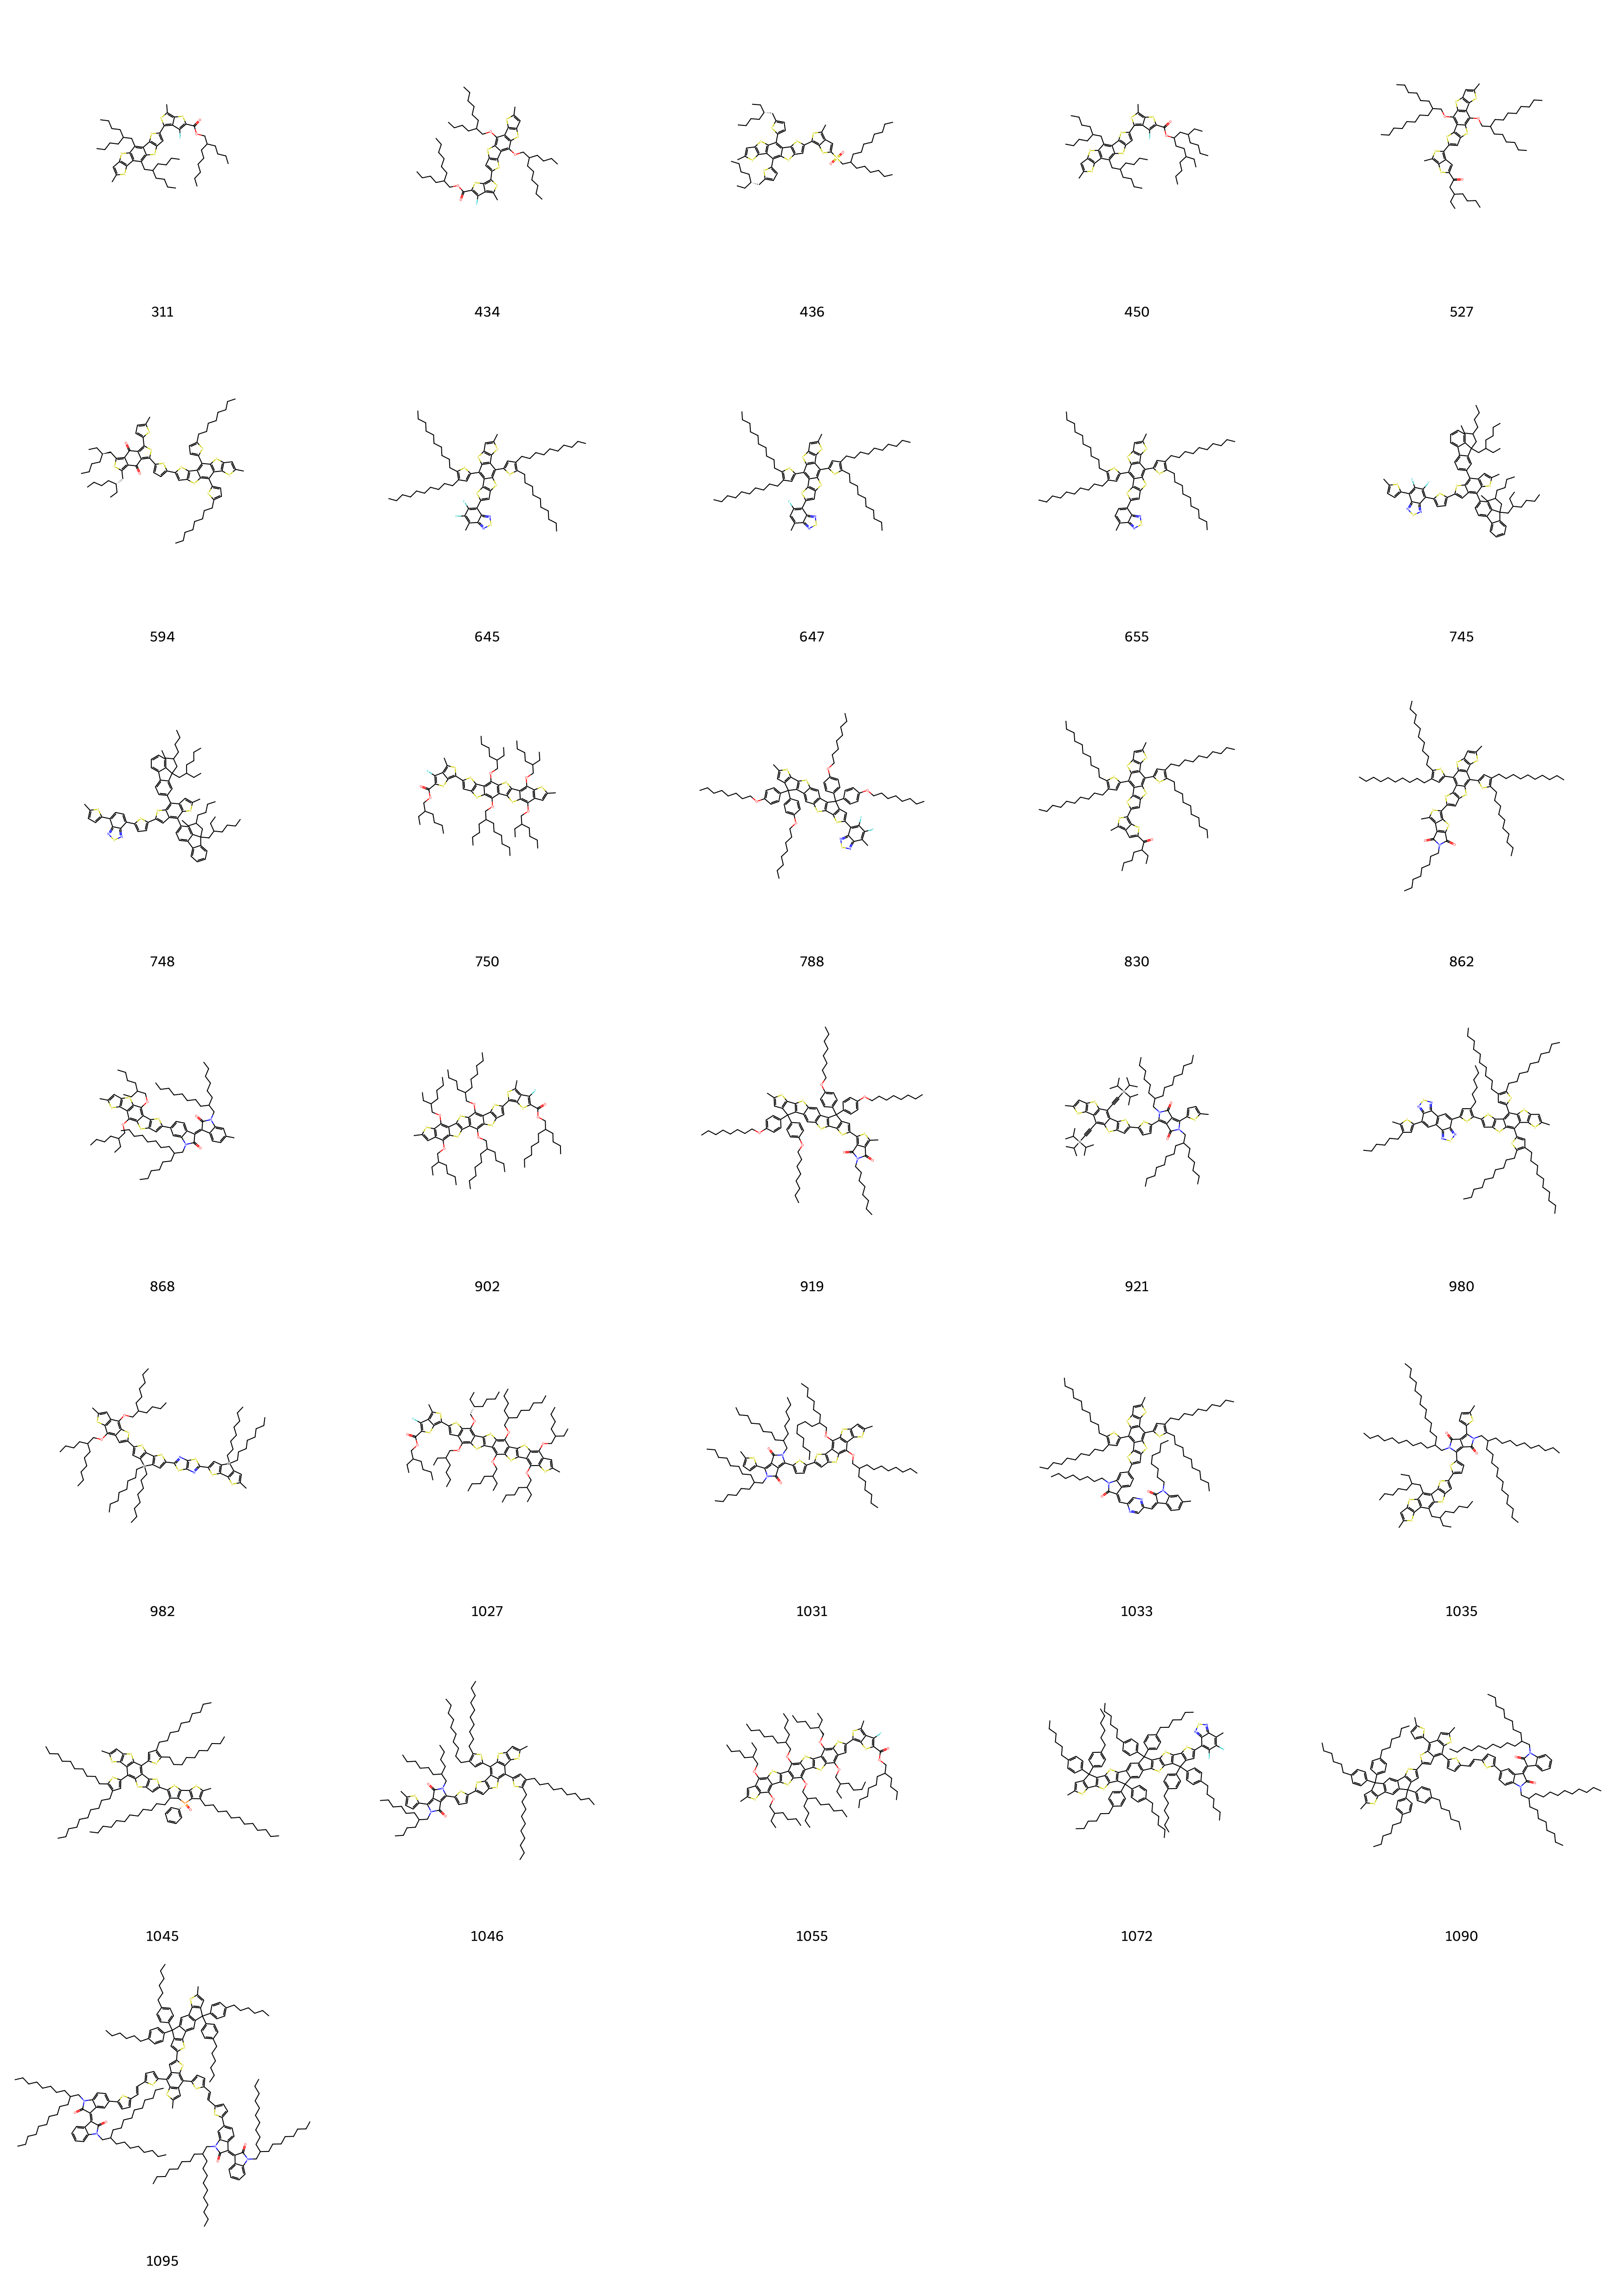

In [40]:
interval = 40
# 创建一个绘图选项对象
options = Draw.MolDrawOptions()
options.legendFontSize = 30
for i in range(0,len(c_smiles),interval):
    if (i+interval) <= len(c_smiles):
        sample_smiles = c_smiles[i:i+interval]
    else:
        sample_smiles = c_smiles[i:len(c_smiles)]
    sample_mols = [Chem.MolFromSmiles(smiles) for smiles in sample_smiles]
#     label = idx_list[i:i+40]
    label = list(map(str, idx_list[i:i+40]))
    grid = Draw.MolsToGridImage(sample_mols,
                               molsPerRow=5,
                               subImgSize=(700,700),
                                legends = label,
                                drawOptions=options,
#                                useSVG=True
                               )
grid